# 1st FWD Project

#### in this project I will be analyizing the FBI Gun dataset to answer######"which states are the highest growth in gun registration?"


'FBI Gun Dataset' is a set of data represents the recoreds of FBI regarding how many people have a gun in the USA for each state and what kind of the permition they have for the gun also included the gun type and year of registration

the set contains before cleaning 27 cloumns and 12485 rows
permit column is the most important one and it represent the registration action by the set of people who registered

#### steps expected to answer the question "which states are the highest growth in gun registration?"
1)Importing the data and the libraries that will be used

2)cleaning and wrangling the data 
a)check missing data

b)check the data unique no. of rows

c)explore the data type

d)drop missing valus

e)split column to get a clear better output

f)delet unneeded column

g)reindexing the columns

h)rename the columns

i)split the table into 2 parts each represent a year to prepare for a visual comparsion

j)group by and filtering the data

3)visualizing the data 

4)write the conclusion 


## Importing the data

In [4]:
# first i have to load the data 
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_excel(r'C:\Users\FADIA\Desktop\FBI Gun Data.xlsx')
df.head()


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


### Exploring the data

In [5]:
#   looking of the missing data.
sum(df.isnull().any()) #working

23

In [6]:
#function to make sure of data uniqueness
df.nunique()#working


month                          227
state                           55
permit                        5390
permit_recheck                 168
handgun                       7381
long_gun                      8350
other                         1226
multiple                      1387
admin                          499
prepawn_handgun                 90
prepawn_long_gun               133
prepawn_other                   16
redemption_handgun            1893
redemption_long_gun           2370
redemption_other                47
returned_handgun               237
returned_long_gun              113
returned_other                  34
rentals_handgun                  9
rentals_long_gun                 8
private_sale_handgun           152
private_sale_long_gun          136
private_sale_other              43
return_to_seller_handgun        17
return_to_seller_long_gun       17
return_to_seller_other           5
totals                       10218
dtype: int64

In [4]:
#function to explore the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

## Cleaning the data

In [7]:
#after making sure that filling the missing rows using the mean here may not be the accurate decision i decided to delete the 
# missing valus and work on the part of the data that its totally accurate 
#below function to drop missing valus 
df.dropna(inplace=True)


In [8]:
#Function to make sure that there is no more nulls or missing cells to confirm the provious function
df.isnull().any().sum()#working

0

In [9]:
#after deleting the nulls data set turned to be 770 rows and 27 columns
df

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,2016-08,Virginia,776.0,0.0,21108.0,15802.0,978.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38667
766,2016-08,Washington,14063.0,33.0,15083.0,11376.0,1622.0,606,8.0,6.0,...,8.0,0.0,0.0,503.0,444.0,23.0,11.0,4.0,1.0,46645
767,2016-08,West Virginia,1948.0,0.0,6916.0,5283.0,243.0,345,14.0,9.0,...,1.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,17315
768,2016-08,Wisconsin,25551.0,0.0,14764.0,12079.0,709.0,43,0.0,0.0,...,4.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,53689


In [10]:
#function to show a single column
df['month']

0      2017-09
1      2017-09
2      2017-09
3      2017-09
4      2017-09
        ...   
765    2016-08
766    2016-08
767    2016-08
768    2016-08
769    2016-08
Name: month, Length: 770, dtype: object

In [11]:
#function to split the column into two columns
df[["Month", "Year"]] = df["month"].str.split("-", expand = True)


In [12]:
#function to delet the column after wrangling it to avoid any duplication for the data
del df['month']#working

In [13]:
#function to recall the data inorder to make sure that the changes took place
df.head()

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Month,Year
0,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,...,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017,09
1,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,...,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,2017,09
2,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,...,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,2017,09
3,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,...,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,2017,09
4,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,2017,09


In [14]:
#data need to be reordering to make the month and date in the beginning of the set 
#function to reordering the data cloumns
df = df.reindex(columns=['Month','Year','state','permit',
'permit_recheck','handgun','long_gun',
'other','multiple',
'admin',
'prepawn_handgun',
'prepawn_long_gun',
'prepawn_other',
'redemption_handgun',
'redemption_long_gun',
'redemption_other',
'returned_handgun',
'returned_long_gun',
'returned_other',
'rentals_handgun',
'rentals_long_gun',
'private_sale_handgun',
'private_sale_long_gun',
'private_sale_other',
'return_to_seller_handgun',
'return_to_seller_long_gun',
'return_to_seller_other',
'totals'])

In [15]:
#making sure everything going right 
df.head()

,Month,Year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017,09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017,09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017,09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017,09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017,09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [16]:
#function to rename the data 
df = df.rename(columns = {'Month': 'year', 'Year': 'month'}, inplace = False)
df

,year,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017,09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017,09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017,09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017,09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017,09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,2016,08,Virginia,776.0,0.0,21108.0,15802.0,978.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38667
766,2016,08,Washington,14063.0,33.0,15083.0,11376.0,1622.0,606,8.0,...,8.0,0.0,0.0,503.0,444.0,23.0,11.0,4.0,1.0,46645
767,2016,08,West Virginia,1948.0,0.0,6916.0,5283.0,243.0,345,14.0,...,1.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,17315
768,2016,08,Wisconsin,25551.0,0.0,14764.0,12079.0,709.0,43,0.0,...,4.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,53689


In [17]:
#Function to rename the whole set
df = df.rename(columns = {'handgun': 'hg', 'longgun': 'lg','prepawn_handgun':'prepawn_hg','prepawn_long_gun':'prepawn_lg',
                          'redemption_handgun':'redemption_hg','redemption_long_gun':'redemption_lg','rentals_handgun':'rentals_hg',
                         'rentals_long_gun':'rentals_lg','private_sale_handgun':'private_sale_hg','private_sale_long_gun':'private_sale_lg','returned_handgun':'returned_hg',
                          'returned_long_gun':'returned_lg','return_to_seller_handgun':'return_to_seller_hg','return_to_seller_long_gun':'return_to_seller_lg'
                         }, inplace = False)
df.head()

,year,month,state,permit,permit_recheck,hg,long_gun,other,multiple,admin,...,returned_other,rentals_hg,rentals_lg,private_sale_hg,private_sale_lg,private_sale_other,return_to_seller_hg,return_to_seller_lg,return_to_seller_other,totals
0,2017,09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017,09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017,09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017,09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017,09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [18]:
#conaitou on renaming 
df = df.rename(columns = {'long_gun': 'lg'}, inplace = False)
df

,year,month,state,permit,permit_recheck,hg,lg,other,multiple,admin,...,returned_other,rentals_hg,rentals_lg,private_sale_hg,private_sale_lg,private_sale_other,return_to_seller_hg,return_to_seller_lg,return_to_seller_other,totals
0,2017,09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017,09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017,09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017,09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017,09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,2016,08,Virginia,776.0,0.0,21108.0,15802.0,978.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38667
766,2016,08,Washington,14063.0,33.0,15083.0,11376.0,1622.0,606,8.0,...,8.0,0.0,0.0,503.0,444.0,23.0,11.0,4.0,1.0,46645
767,2016,08,West Virginia,1948.0,0.0,6916.0,5283.0,243.0,345,14.0,...,1.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,17315
768,2016,08,Wisconsin,25551.0,0.0,14764.0,12079.0,709.0,43,0.0,...,4.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,53689


### Dataset Description after 1st phase cleaning  
df is equal the FBI gun data for both 2016 and 2017 
for 2016 it includes recordes for months (08,09,10,11,12)
for 2017 it includes recordes for months (01,02,03,04,05,06,07,08,09)


### in this part of cleaning i will work on prepering the set to answer my question which its mentioned earlier and thats by 
1) visualising the months to make sure if there is any spike or trend in any of the months 

2) group by and sort the data descending to answer the question which 5 states considered the highest growth of the gun registartion for the 2 years

### Cleaning Phase 2

In [19]:
#function to create new set called df_a represents only 2017 and df_b represents only 2016
df_a=df.loc[df['year'] == '2017']
df_b=df.loc[df['year'] == '2016']
df_b

,year,month,state,permit,permit_recheck,hg,lg,other,multiple,admin,...,returned_other,rentals_hg,rentals_lg,private_sale_hg,private_sale_lg,private_sale_other,return_to_seller_hg,return_to_seller_lg,return_to_seller_other,totals
495,2016,12,Alabama,26996.0,0.0,13733.0,17519.0,376.0,533,0.0,...,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,62014
496,2016,12,Alaska,254.0,0.0,4087.0,3698.0,243.0,191,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8786
497,2016,12,Arizona,8900.0,121.0,18024.0,13785.0,1180.0,703,0.0,...,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,44887
498,2016,12,Arkansas,3294.0,692.0,9192.0,13433.0,277.0,385,37.0,...,0.0,0.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,29926
499,2016,12,California,61808.0,0.0,63649.0,93224.0,77929.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,298161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,2016,08,Virginia,776.0,0.0,21108.0,15802.0,978.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38667
766,2016,08,Washington,14063.0,33.0,15083.0,11376.0,1622.0,606,8.0,...,8.0,0.0,0.0,503.0,444.0,23.0,11.0,4.0,1.0,46645
767,2016,08,West Virginia,1948.0,0.0,6916.0,5283.0,243.0,345,14.0,...,1.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,17315
768,2016,08,Wisconsin,25551.0,0.0,14764.0,12079.0,709.0,43,0.0,...,4.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,53689


In [21]:
#function to create different sets each one represent a single month in 2017 (df_a)
#function to make it easy to visual each month of the records
df_a_9=df_a.loc[df_a['month'] == '09']
df_a_8=df_a.loc[df_a['month'] == '08']
df_a_7=df_a.loc[df_a['month'] == '07']
df_a_6=df_a.loc[df_a['month'] == '06']
df_a_5=df_a.loc[df_a['month'] == '05']

df_a_4=df_a.loc[df_a['month'] == '04']

df_a_3=df_a.loc[df_a['month'] == '03']

df_a_2=df_a.loc[df_a['month'] == '02']

df_a_1=df_a.loc[df_a['month'] == '01']

In [ ]:
filtered_list = list(filter(lambda num: (num > 7), numbers_list))


In [22]:
#function to create different sets each one represent a single month in 2016 (df_b)
df_b_8=df_b.loc[df_b['month'] == '08']
df_b_9=df_b.loc[df_b['month'] == '09']
df_b_10=df_b.loc[df_b['month'] == '10']
df_b_11=df_b.loc[df_b['month'] == '11']

df_b_12=df_b.loc[df_b['month'] == '12']

In [45]:
#function to drop column 
df_17=(df_a.drop(columns=['month']))
df_16=(df_b.drop(columns=['month']))
df_16.apply(lambda x:x)

,year,state,permit,permit_recheck,hg,lg,other,multiple,admin,prepawn_hg,...,returned_other,rentals_hg,rentals_lg,private_sale_hg,private_sale_lg,private_sale_other,return_to_seller_hg,return_to_seller_lg,return_to_seller_other,totals
495,2016,Alabama,26996.0,0.0,13733.0,17519.0,376.0,533,0.0,10.0,...,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,62014
496,2016,Alaska,254.0,0.0,4087.0,3698.0,243.0,191,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8786
497,2016,Arizona,8900.0,121.0,18024.0,13785.0,1180.0,703,0.0,10.0,...,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,44887
498,2016,Arkansas,3294.0,692.0,9192.0,13433.0,277.0,385,37.0,4.0,...,0.0,0.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,29926
499,2016,California,61808.0,0.0,63649.0,93224.0,77929.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,298161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,2016,Virginia,776.0,0.0,21108.0,15802.0,978.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38667
766,2016,Washington,14063.0,33.0,15083.0,11376.0,1622.0,606,8.0,6.0,...,8.0,0.0,0.0,503.0,444.0,23.0,11.0,4.0,1.0,46645
767,2016,West Virginia,1948.0,0.0,6916.0,5283.0,243.0,345,14.0,9.0,...,1.0,0.0,0.0,3.0,1.0,0.0,0.0,2.0,0.0,17315
768,2016,Wisconsin,25551.0,0.0,14764.0,12079.0,709.0,43,0.0,0.0,...,4.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,53689


In [21]:
#function to groupby the 2017 part of the data using the year and the state
df_017=df_17.groupby(['year','state']).sum()
df_017.sort_values("permit", ascending=False)


permit  permit_recheck        hg        lg  \
year state                                                                 
2017 Kentucky              3229334.0             0.0   89187.0   60664.0   
     California             531810.0             0.0  380263.0  221234.0   
     Minnesota              346901.0             0.0   78202.0   88846.0   
     Indiana                295619.0             0.0  183884.0  102790.0   
     Pennsylvania           233862.0             0.0  409604.0  111462.0   
     Texas                  228878.0             0.0  405030.0  285530.0   
     North Carolina         228436.0             0.0   12055.0   99717.0   
     Tennessee              206455.0             0.0  212421.0  119129.0   
     Alabama                187155.0           749.0   68785.0   51771.0   
     Florida                178319.0             0.0  459601.0  185280.0   
     Michigan               174487.0           181.0  103715.0   80494.0   
     Georgia                149087.0             0.0  123101.0   67994.0   
     Wisconsin              137868.0             0.0  129794.0  108022.0   
     Utah                   128339.0           313.0   30423.0   30318.0   
     Illinois               127309.0        721978.0  208096.0   98819.0   
     South Carolina         123675.0          5779.0   88705.0   49018.0   
     Washington             119467.0           581.0  144349.0   94619.0   
     Ohio                   109493.0          2628.0  244699.0  139129.0   
     Iowa                    79953.0          7970.0    1739.0   19594.0   
     Massachusetts           73409.0             1.0   50371.0   24188.0   
     Arizona                 63537.0          1592.0  111579.0   68031.0   
     Connecticut             62291.0          1367.0   54338.0   18295.0   
     Idaho                   52422.0            16.0   31115.0   35816.0   
     Colorado                48967.0             0.0  162139.0  112027.0   
     Nebraska                33172.0           624.0    1138.0   14619.0   
     Arkansas                29647.0          6559.0   51057.0   44667.0   
     New York                26316.0         12576.0   96405.0  122593.0   
     Maryland                26141.0             0.0   38477.0   43486.0   
     Oregon                  25367.0           138.0  122185.0   92090.0   
     Louisiana               23536.0             0.0  100038.0   69534.0   
     Kansas                  22712.0            40.0   52299.0   41715.0   
     Nevada                  20903.0             0.0   41577.0   22406.0   
     New Hampshire           20097.0             0.0   46612.0   25961.0   
     West Virginia           19079.0             0.0   56601.0   46918.0   
     Mississippi             16293.0             0.0   73897.0   48224.0   
     Montana                 13773.0             6.0   24541.0   34576.0   
     South Dakota            11355.0             0.0   22809.0   27809.0   
     New Mexico              10389.0             0.0   49729.0   35230.0   
     North Dakota             9729.0             0.0   14383.0   20292.0   
     Hawaii                   9196.0             0.0       0.0       0.0   
     Virginia                 9107.0             0.0  214436.0  133773.0   
     Missouri                 7863.0             0.0  183064.0  123928.0   
     Maine                    6494.0             0.0   30266.0   25522.0   
     Delaware                 5216.0             0.0   16609.0   12111.0   
     Wyoming                  3447.0           167.0   13906.0   15122.0   
     Alaska                   2140.0            22.0   24596.0   22411.0   
     Virgin Islands            644.0             0.0     228.0      44.0   
     District of Columbia      156.0             0.0     557.0      35.0   
     Rhode Island                0.0             0.0    9771.0    5823.0   
     Puerto Rico                 0.0             0.0    9965.0    1753.0   
     Oklahoma                    0.0             0.0  102785.0   77253.0   
  

In [26]:
#function to groupby the 2018 part of the data using the year and the state
df_016=df_16.groupby(['year','state']).sum()
df_016.sort_values("permit", ascending=False)


permit  permit_recheck        hg        lg  \
year state                                                                 
2016 Kentucky              1296727.0             0.0   58028.0   56999.0   
     California             313395.0             0.0  248923.0  316678.0   
     Indiana                187159.0             0.0  112860.0   88889.0   
     Minnesota              163323.0             0.0   55102.0   75098.0   
     Pennsylvania           143061.0             0.0  279500.0   79795.0   
     North Carolina         138974.0             0.0    7501.0   93749.0   
     Texas                  137338.0             0.0  254619.0  252425.0   
     Wisconsin              135402.0             0.0   77650.0   78918.0   
     Florida                129447.0             0.0  277911.0  148406.0   
     Alabama                117604.0             0.0   47072.0   56111.0   
     Illinois                99422.0        410372.0  173150.0   93386.0   
     Michigan                88362.0         10722.0   64068.0   66536.0   
     Georgia                 85980.0             0.0   80570.0   70587.0   
     Washington              69758.0           639.0   90314.0   73202.0   
     Tennessee               65918.0          1946.0  133419.0  106805.0   
     Utah                    64594.0            69.0   21083.0   28824.0   
     Ohio                    61966.0           493.0  159451.0  119508.0   
     South Carolina          57004.0             0.0   55262.0   48120.0   
     Iowa                    55185.0           456.0    1347.0   18530.0   
     Massachusetts           43034.0             7.0   31767.0   18472.0   
     Arizona                 42763.0           513.0   69117.0   52713.0   
     Connecticut             40290.0             0.0   36793.0   15522.0   
     Colorado                29044.0             0.0  105806.0   86465.0   
     Nebraska                22356.0           274.0     858.0   14151.0   
     Arkansas                19344.0          4299.0   32493.0   45926.0   
     New Hampshire           18796.0             0.0   28708.0   20906.0   
     New York                18609.0          1846.0   54467.0  100990.0   
     Louisiana               18444.0             0.0   70908.0   79144.0   
     Maryland                14187.0             0.0   22436.0   35702.0   
     Idaho                   13492.0            35.0   20413.0   28480.0   
     Missouri                12817.0             0.0  111685.0  105163.0   
     Nevada                  11179.0             0.0   27692.0   17851.0   
     Mississippi             10905.0             0.0   48211.0   54712.0   
     Kansas                   9439.0            10.0   33047.0   38153.0   
     West Virginia            8822.0             0.0   38452.0   42277.0   
     Montana                  7390.0             0.0   15534.0   27958.0   
     South Dakota             6962.0             0.0   15025.0   25889.0   
     Hawaii                   6289.0             0.0       0.0       0.0   
     New Mexico               5049.0             0.0   29049.0   26510.0   
     North Dakota             4620.0             0.0    7857.0   16906.0   
     Virginia                 4236.0             0.0  127886.0  107364.0   
     Wyoming                  2969.0            45.0    9588.0   12268.0   
     Delaware                 2894.0             0.0   10670.0   11270.0   
     Maine                    2817.0             0.0   20231.0   25485.0   
     Oregon                   2580.0             6.0   76679.0   68352.0   
     Alaska                   1333.0             0.0   16768.0   18276.0   
     Virgin Islands            235.0             0.0     102.0      36.0   
     District of Columbia        7.0             0.0     270.0      19.0   
     Rhode Island                0.0             0.0    5786.0    4505.0   
     New Jersey                  0.0             0.0   26973.0   23092.0   
     Puerto Rico                 0.0             0.0    6005.0    1101.0   
  

In [28]:
#function to create a final set to use it of expecting the answer for both years 
df_2017= df_017.filter(['year','state','permit'], axis=1)
df_2016= df_016.filter(['year','state','permit'], axis=1)


#function to descending order the both tables
df_2016=df_2016.sort_values("permit", ascending=False).reset_index()
df_2017=df_2017.sort_values("permit", ascending=False).reset_index()


df_2017


,year,state,permit
0,2017,Kentucky,3229334.0
1,2017,California,531810.0
2,2017,Minnesota,346901.0
3,2017,Indiana,295619.0
4,2017,Pennsylvania,233862.0
5,2017,Texas,228878.0
6,2017,North Carolina,228436.0
7,2017,Tennessee,206455.0
8,2017,Alabama,187155.0
9,2017,Florida,178319.0


In [29]:
#function to filter the table in order to prepare it for the visualization-----2017 part of the data 
df_df= df_017.filter(['year','state','permit','hg','lg','other'], axis=1)
df_df

permit        hg        lg    other
year state                                                       
2017 Alabama                187155.0   68785.0   51771.0   2303.0
     Alaska                   2140.0   24596.0   22411.0   1946.0
     Arizona                 63537.0  111579.0   68031.0   8889.0
     Arkansas                29647.0   51057.0   44667.0   1932.0
     California             531810.0  380263.0  221234.0  26011.0
     Colorado                48967.0  162139.0  112027.0  10436.0
     Connecticut             62291.0   54338.0   18295.0   1925.0
     Delaware                 5216.0   16609.0   12111.0    704.0
     District of Columbia      156.0     557.0      35.0      0.0
     Florida                178319.0  459601.0  185280.0  27358.0
     Georgia                149087.0  123101.0   67994.0   3767.0
     Guam                        0.0     796.0     419.0     84.0
     Hawaii                   9196.0       0.0       0.0      0.0
     Idaho                   52422.0   31115.0   35816.0   1864.0
     Illinois               127309.0  208096.0   98819.0      0.0
     Indiana                295619.0  183884.0  102790.0  10640.0
     Iowa                    79953.0    1739.0   19594.0    351.0
     Kansas                  22712.0   52299.0   41715.0   3590.0
     Kentucky              3229334.0   89187.0   60664.0   2375.0
     Louisiana               23536.0  100038.0   69534.0   6970.0
     Maine                    6494.0   30266.0   25522.0   1987.0
     Mariana Islands             0.0      78.0      19.0      3.0
     Maryland                26141.0   38477.0   43486.0   1872.0
     Massachusetts           73409.0   50371.0   24188.0   3584.0
     Michigan               174487.0  103715.0   80494.0   4219.0
     Minnesota              346901.0   78202.0   88846.0   5998.0
     Mississippi             16293.0   73897.0   48224.0   2415.0
     Missouri                 7863.0  183064.0  123928.0  10977.0
     Montana                 13773.0   24541.0   34576.0   1547.0
     Nebraska                33172.0    1138.0   14619.0    166.0
     Nevada                  20903.0   41577.0   22406.0   2304.0
     New Hampshire           20097.0   46612.0   25961.0   1393.0
     New Jersey                  0.0   47381.0   28015.0   1717.0
     New Mexico              10389.0   49729.0   35230.0   3745.0
     New York                26316.0   96405.0  122593.0   9192.0
     North Carolina         228436.0   12055.0   99717.0   6223.0
     North Dakota             9729.0   14383.0   20292.0    895.0
     Ohio                   109493.0  244699.0  139129.0  14060.0
     Oklahoma                    0.0  102785.0   77253.0   8495.0
     Oregon                  25367.0  122185.0   92090.0      0.0
     Pennsylvania           233862.0  409604.0  111462.0    912.0
     Puerto Rico                 0.0    9965.0    1753.0    375.0
     Rhode Island                0.0    9771.0    5823.0    686.0
     South Carolina         123675.0   88705.0   49018.0   4783.0
     South Dakota            11355.0   22809.0   27809.0   2271.0
     Tennessee              206455.0  212421.0  119129.0  11140.0
     Texas                  228878.0  405030.0  285530.0  26428.0
     Utah                   128339.0   30423.0   30318.0   2031.0
     Vermont                     0.0   13322.0   12227.0    852.0
     Virgin Islands            644.0     228.0      44.0      1.0
     Virginia                 9107.0  214436.0  133773.0   9570.0
     Washington             119467.0  144349.0   94619.0  16022.0
     West Virginia           19079.0   56601.0   46918.0   2313.0
     Wisconsin              137868.0  129794.0  108022.0   6782.0
     Wyoming                  3447.0   13906.0   15122.0    887.0

In [30]:
#function to filter the table in order to prepare it for the visualization-----2016 part of the data 

df_fd= df_016.filter(['year','state','permit','hg','lg','other'], axis=1)
df_fd

permit        hg        lg     other
year state                                                        
2016 Alabama                117604.0   47072.0   56111.0    1838.0
     Alaska                   1333.0   16768.0   18276.0    1269.0
     Arizona                 42763.0   69117.0   52713.0    5862.0
     Arkansas                19344.0   32493.0   45926.0    1292.0
     California             313395.0  248923.0  316678.0  154022.0
     Colorado                29044.0  105806.0   86465.0    7134.0
     Connecticut             40290.0   36793.0   15522.0     736.0
     Delaware                 2894.0   10670.0   11270.0     541.0
     District of Columbia        7.0     270.0      19.0       0.0
     Florida                129447.0  277911.0  148406.0   18003.0
     Georgia                 85980.0   80570.0   70587.0    2758.0
     Guam                        0.0     530.0     294.0      80.0
     Hawaii                   6289.0       0.0       0.0       0.0
     Idaho                   13492.0   20413.0   28480.0    1212.0
     Illinois                99422.0  173150.0   93386.0       0.0
     Indiana                187159.0  112860.0   88889.0    7321.0
     Iowa                    55185.0    1347.0   18530.0     133.0
     Kansas                   9439.0   33047.0   38153.0    2296.0
     Kentucky              1296727.0   58028.0   56999.0    1592.0
     Louisiana               18444.0   70908.0   79144.0    4712.0
     Maine                    2817.0   20231.0   25485.0    1385.0
     Mariana Islands             0.0       0.0       8.0       1.0
     Maryland                14187.0   22436.0   35702.0     835.0
     Massachusetts           43034.0   31767.0   18472.0    1753.0
     Michigan                88362.0   64068.0   66536.0    2759.0
     Minnesota              163323.0   55102.0   75098.0    4250.0
     Mississippi             10905.0   48211.0   54712.0    1760.0
     Missouri                12817.0  111685.0  105163.0    7354.0
     Montana                  7390.0   15534.0   27958.0     939.0
     Nebraska                22356.0     858.0   14151.0     111.0
     Nevada                  11179.0   27692.0   17851.0    1523.0
     New Hampshire           18796.0   28708.0   20906.0    1044.0
     New Jersey                  0.0   26973.0   23092.0    1041.0
     New Mexico               5049.0   29049.0   26510.0    2111.0
     New York                18609.0   54467.0  100990.0    5236.0
     North Carolina         138974.0    7501.0   93749.0    4365.0
     North Dakota             4620.0    7857.0   16906.0     528.0
     Ohio                    61966.0  159451.0  119508.0    9645.0
     Oklahoma                    0.0   66417.0   67527.0    5395.0
     Oregon                   2580.0   76679.0   68352.0       0.0
     Pennsylvania           143061.0  279500.0   79795.0     157.0
     Puerto Rico                 0.0    6005.0    1101.0     152.0
     Rhode Island                0.0    5786.0    4505.0     426.0
     South Carolina          57004.0   55262.0   48120.0    3000.0
     South Dakota             6962.0   15025.0   25889.0    1421.0
     Tennessee               65918.0  133419.0  106805.0    5011.0
     Texas                  137338.0  254619.0  252425.0   17039.0
     Utah                    64594.0   21083.0   28824.0    1615.0
     Vermont                     0.0    7131.0    9069.0     511.0
     Virgin Islands            235.0     102.0      36.0       0.0
     Virginia                 4236.0  127886.0  107364.0    5807.0
     Washington              69758.0   90314.0   73202.0   10667.0
     West Virginia            8822.0   38452.0   42277.0    1523.0
     Wisconsin              135402.0   77650.0   78918.0    4047.0
     Wyoming                  2969.0    9588.0   12268.0     568.0

In [32]:
#preparting the data for answering the question though the visualization this line to filter the first 10 lines as its the answer for my early question

df_gun_2017=df_2017.head(n=10).sort_values("permit", ascending=False).reset_index()
df_gun_2016=df_2016.head(n=10).sort_values("permit", ascending=False).reset_index()

df_gun_2017

,index,year,state,permit
0,0,2017,Kentucky,3229334.0
1,1,2017,California,531810.0
2,2,2017,Minnesota,346901.0
3,3,2017,Indiana,295619.0
4,4,2017,Pennsylvania,233862.0
5,5,2017,Texas,228878.0
6,6,2017,North Carolina,228436.0
7,7,2017,Tennessee,206455.0
8,8,2017,Alabama,187155.0
9,9,2017,Florida,178319.0


### Visualization Phase

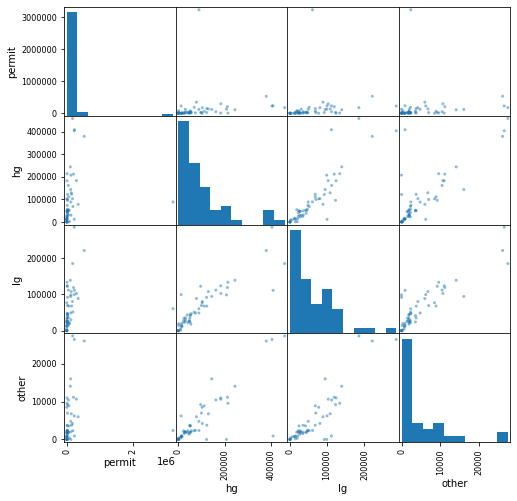

In [41]:
#visualization to compare between the 2 years
#2017 repersentation of permit,hg,lg,other columns

pd.plotting.scatter_matrix(df_df,figsize=(8,8));



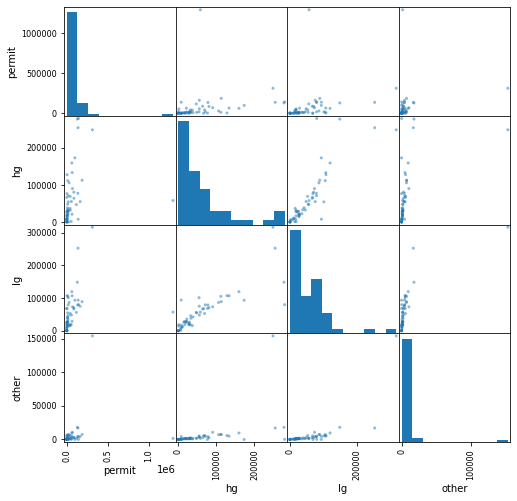

In [34]:
##visualization to compare between the 2 years
#2016 repersentation of permit,hg,lg,other columns

pd.plotting.scatter_matrix(df_fd,figsize=(8,8));

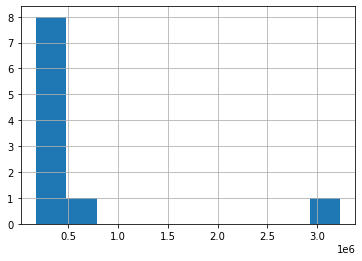

In [46]:
#the plot for testing the column and explore how the most number distrubuted this is why it has no labels 
df_gun_2017['permit'].hist();

### The reason why i used the below bar charts to compare between both years 2016 and 2017 in order to have a very clear answer as represented about the highest states in usa that apply for gun permit 

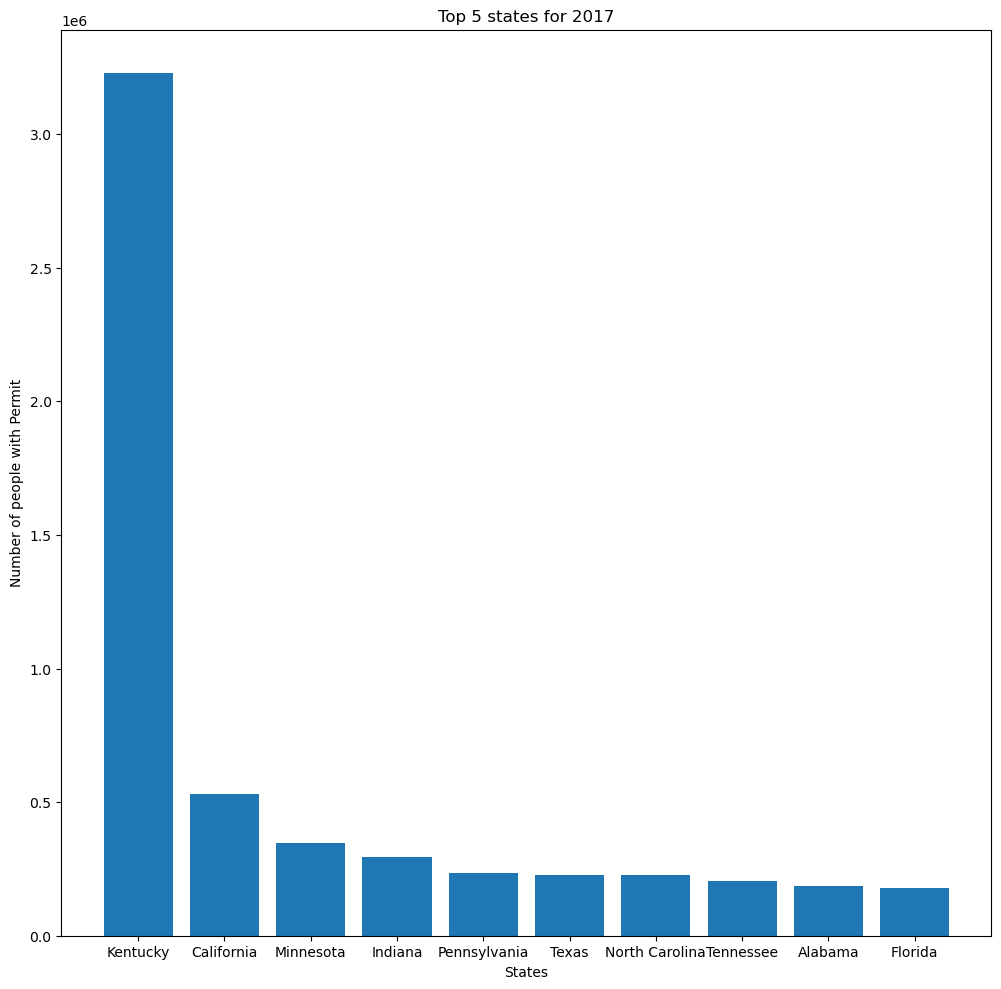

In [37]:
#in this visual we can see the first 10 states represents the highest growth in gun registrations in 2017

plt.figure(figsize=(12,12), dpi=100)
plt.bar(df_gun_2017.state,df_gun_2017.permit)
plt.title("Top 10 states for 2017")
plt.ylabel('Number of people with Permit')
plt.xlabel('States')
plt.show()

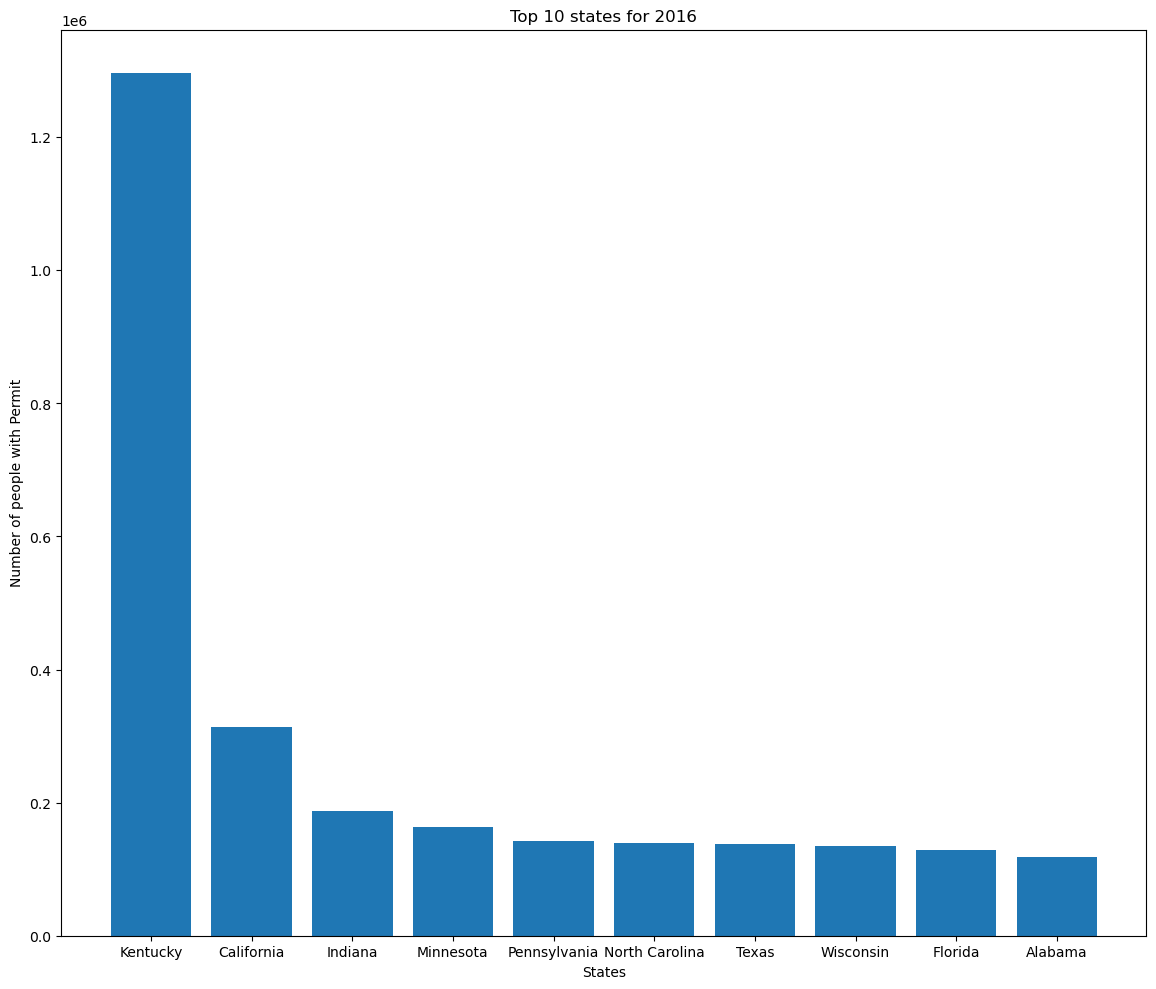

In [38]:
##this visual show the first 10 states represents the highest growth in gun registrations in 2017

plt.figure(figsize=(14,12), dpi=100)
plt.bar(df_gun_2016.state,df_gun_2016.permit)
plt.title("Top 10 states for 2016")
plt.ylabel('Number of people with Permit')
plt.xlabel('States')
plt.show()

### Conclusion

in order to answer the question of what is the highest growth companies in gun registration i get back the the permit column and the output is
          A)Kentucky
          B)California
          C)Indiana
          D)Minnesota
          E)Pennsylvania
for both years 2016 and 2017         

### References

during this project i get back to different sources to help me finish it such as matplotlib website, stackoverflow, I only geet back to 
the sources mentioned in order to learn more and apply it during this project.


### Limitaion

most of the columns for the orginal data was null except for the 2 years mentioned in the analysis i believe if these data was found other questions would be part of the analysis